In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('Feature_Scaling.xlsx')

In [ ]:
df

,Age,New Role,Team Size,Rating,Sales
0,30,0,12,5,150000
1,22,1,15,3,100000
2,24,0,14,4,90000
3,25,0,15,3,110000
4,24,0,9,4,98000
5,28,0,11,5,112000
6,26,0,10,3,95000
7,31,0,14,1,135000
8,25,1,12,4,75000
9,29,0,9,2,120000


In [ ]:
df.columns

Index(['Age', 'New Role', 'Team Size', 'Rating', 'Sales'], dtype='object')

In [ ]:
df_sub = df[['Age', 'Team Size', 'Sales']]

In [ ]:
df_sub

,Age,Team Size,Sales
0,30,12,150000
1,22,15,100000
2,24,14,90000
3,25,15,110000
4,24,9,98000
5,28,11,112000
6,26,10,95000
7,31,14,135000
8,25,12,75000
9,29,9,120000


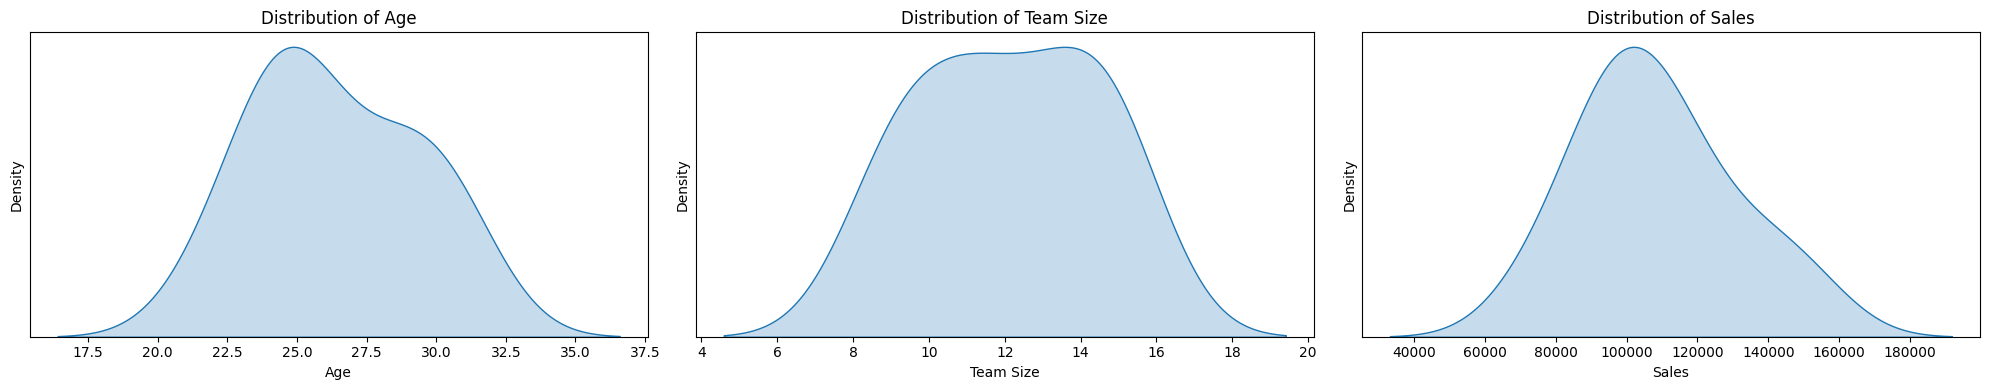

In [ ]:
columns_to_scale = df_sub.columns
plt.figure(figsize=(20, 4))

for i in range(len(df_sub.columns)):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(x = columns_to_scale[i], data = df_sub, fill = 'blue')
    plt.title("Distribution of " + columns_to_scale[i])
    plt.yticks([])

plt.tight_layout()
plt.show()

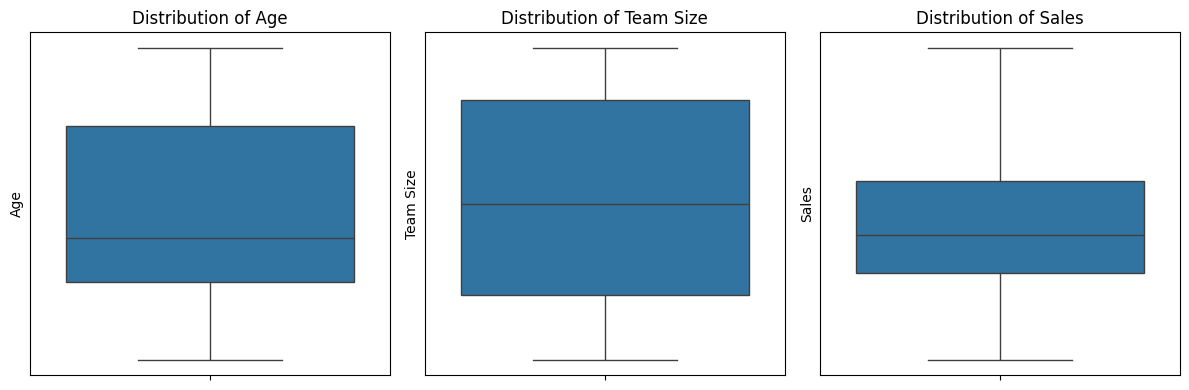

In [ ]:
columns_to_scale = df_sub.columns
plt.figure(figsize=(12, 4))

for i in range(len(df_sub.columns)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y = columns_to_scale[i], data = df_sub)
    plt.title("Distribution of " + columns_to_scale[i])
    plt.yticks([])

plt.tight_layout()
plt.show()

In [ ]:
scaler1 = StandardScaler()
scaler1.fit_transform(df_sub)

array([[ 1.28571429, -0.04522156,  1.97832247],
       [-1.57142857,  1.31142533, -0.40519858],
       [-0.85714286,  0.8592097 , -0.88190279],
       [-0.5       ,  1.31142533,  0.07150563],
       [-0.85714286, -1.40186846, -0.50053942],
       [ 0.57142857, -0.49743719,  0.16684647],
       [-0.14285714, -0.94965283, -0.64355068],
       [ 1.64285714,  0.8592097 ,  1.26326616],
       [-0.5       , -0.04522156, -1.5969591 ],
       [ 0.92857143, -1.40186846,  0.54820984]])

In [ ]:
scaled_output1 = pd.DataFrame(scaler1.fit_transform(df_sub), columns = df_sub.columns)
scaled_output1

,Age,Team Size,Sales
0,1.285714,-0.045222,1.978322
1,-1.571429,1.311425,-0.405199
2,-0.857143,0.859210,-0.881903
3,-0.500000,1.311425,0.071506
4,-0.857143,-1.401868,-0.500539
5,0.571429,-0.497437,0.166846
6,-0.142857,-0.949653,-0.643551
7,1.642857,0.859210,1.263266
8,-0.500000,-0.045222,-1.596959
9,0.928571,-1.401868,0.548210


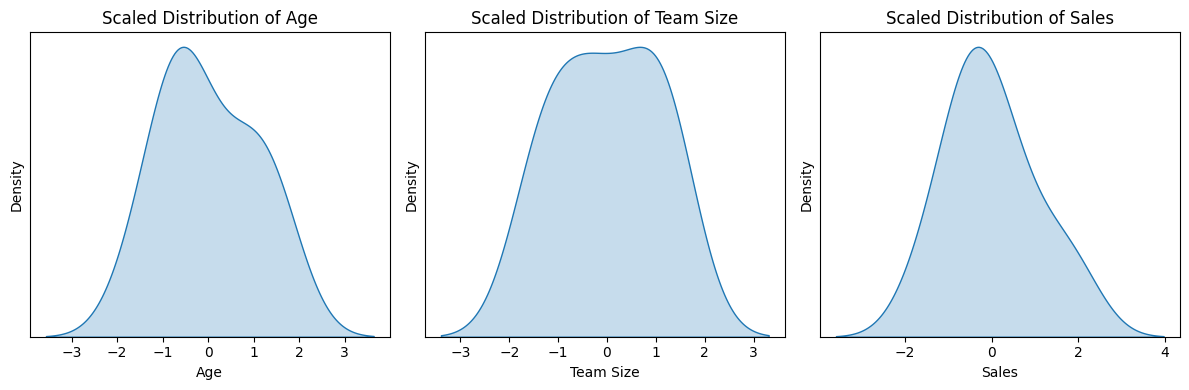

In [ ]:
plt.figure(figsize=(12, 4))

for i in range(len(df_sub.columns)):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(x = columns_to_scale[i], data = scaled_output1, fill = 'blue')
    plt.title("Scaled Distribution of " + columns_to_scale[i])
    plt.yticks([])

plt.tight_layout()
plt.show()

In [ ]:
scaler2 = MinMaxScaler()
scaled_output2 = pd.DataFrame(scaler2.fit_transform(df_sub), columns = df_sub.columns)
scaled_output2

,Age,Team Size,Sales
0,0.888889,0.500000,1.000000
1,0.000000,1.000000,0.333333
2,0.222222,0.833333,0.200000
3,0.333333,1.000000,0.466667
4,0.222222,0.000000,0.306667
5,0.666667,0.333333,0.493333
6,0.444444,0.166667,0.266667
7,1.000000,0.833333,0.800000
8,0.333333,0.500000,0.000000
9,0.777778,0.000000,0.600000


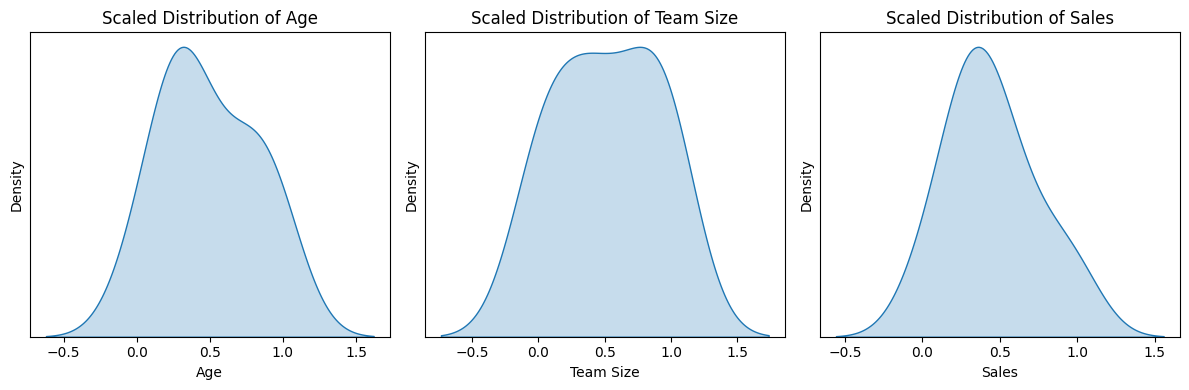

In [ ]:
plt.figure(figsize=(12, 4))

for i in range(len(df_sub.columns)):
  plt.subplot(1, 3, i+1)
  sns.kdeplot(x = columns_to_scale[i], data = scaler_output2, fill = 'blue')
  plt.title("Scaled Distribution of " + columns_to_scale[i])
  plt.yticks([])

plt.tight_layout()
plt.show()

In [ ]:
df_sub.mean()

,0
Age,26.4
Team Size,12.1
Sales,108500.0


In [ ]:
df_sub['Age'].loc[1] = 100
df_sub['Age'].loc[5] = 50

df_sub['Sales'].loc[2] = 30
df_sub['Sales'].loc[7] = 500000
df_sub['Sales'].loc[9] = 300000

df_sub['Team Size'].loc[0] = 50

In [ ]:
df_sub.mean()

,0
Age,36.4
Team Size,15.9
Sales,154003.0


In [ ]:
scaler3 = RobustScaler()
scaled_output3 = pd.DataFrame(scaler3.fit_transform(df_sub), columns = df_sub.columns)
scaled_output3

,Age,Team Size,Sales
0,0.434783,8.222222,1.005587
1,12.608696,0.444444,-0.111732
2,-0.608696,0.222222,-2.345698
3,-0.434783,0.444444,0.111732
4,-0.608696,-0.888889,-0.156425
5,3.913043,-0.444444,0.156425
6,-0.260870,-0.666667,-0.223464
7,0.608696,0.222222,8.826816
8,-0.434783,-0.222222,-0.670391
9,0.260870,-0.888889,4.357542


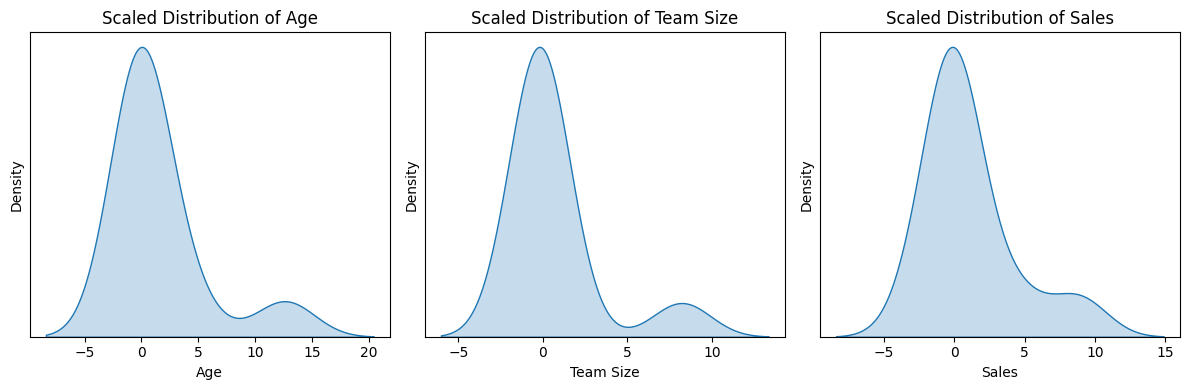

In [ ]:
plt.figure(figsize=(12, 4))

for i in range(len(df_sub.columns)):
  plt.subplot(1, 3, i+1)
  sns.kdeplot(x = columns_to_scale[i], data = scaler_output3, fill = 'blue')
  plt.title("Scaled Distribution of " + columns_to_scale[i])
  plt.yticks([])

plt.tight_layout()
plt.show()

In [ ]:
print("Standard Scaler")
print(scaled_output1.max())
print(" ")
print("MinMax Scaler")
print(scaled_output2.max())
print(" ")
print("Robust Scaler")
print(scaled_output3.max())

Standard Scaler
Age          1.642857
Team Size    1.311425
Sales        1.978322
dtype: float64
 
MinMax Scaler
Age          1.0
Team Size    1.0
Sales        1.0
dtype: float64
 
Robust Scaler
Age          12.608696
Team Size     8.222222
Sales         8.826816
dtype: float64


In [ ]:
print("Standard Scaler")
print(scaled_output1.min())
print(" ")
print("MinMax Scaler")
print(scaled_output2.min())
print(" ")
print("Robust Scaler")
print(scaled_output3.min())

Standard Scaler
Age         -1.571429
Team Size   -1.401868
Sales       -1.596959
dtype: float64
 
MinMax Scaler
Age          0.0
Team Size    0.0
Sales        0.0
dtype: float64
 
Robust Scaler
Age         -0.608696
Team Size   -0.888889
Sales       -2.345698
dtype: float64
